In [1]:
import os

import numpy as np
import matplotlib.pyplot as plt

import torch

from src.FramePrediction import NextFramePredictionModel

In [9]:
X = []
Y = []

for folder in os.listdir("data"):
    rho = np.load(f"data/{folder}/smoke.npy")
    rho = np.expand_dims(rho, -1)
    velocity = np.load(f"data/{folder}/velocity.npy")
    p = np.load(f"data/{folder}/pressure.npy")
    p = np.expand_dims(p, -1)
    
    x = np.concatenate([rho, velocity, p], axis=-1)  # Density, Velocity X, Velocity Y, Pressure
    
    y = x[1:]
    x = x[:-1]
    
    X.append()  
    
    print(f"Loading folder {folder}", end="\r")

In [10]:
X = np.concatenate(X, axis=0)
X.shape

(15000, 64, 64, 4)

In [12]:
X[:-1].shape

(14999, 64, 64, 4)

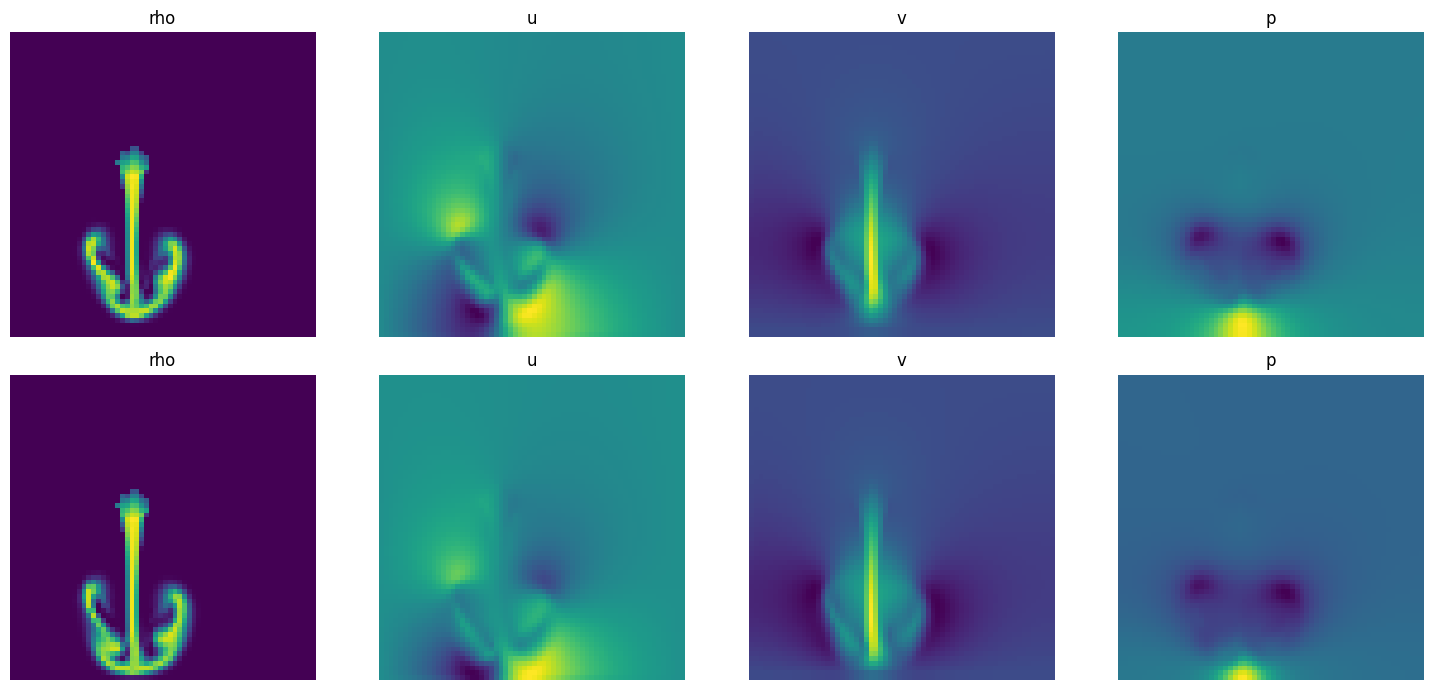

In [34]:
idx = 55

fig, axs = plt.subplots(2, 4, figsize=(15,7))

# Current frame
axs[0,0].imshow(X[idx,:,:,0])
axs[0,0].set_title("rho")
axs[0,0].axis("off")

axs[0,1].imshow(X[idx,:,:,1])
axs[0,1].set_title("u")
axs[0,1].axis("off")

axs[0,2].imshow(X[idx,:,:,2])
axs[0,2].set_title("v")
axs[0,2].axis("off")

axs[0,3].imshow(X[idx,:,:,3])
axs[0,3].set_title("p")
axs[0,3].axis("off")

# Next frame
idx_next = idx + 5
axs[1,0].imshow(X[idx_next,:,:,0])
axs[1,0].set_title("rho")
axs[1,0].axis("off")

axs[1,1].imshow(X[idx_next,:,:,1])
axs[1,1].set_title("u")
axs[1,1].axis("off")

axs[1,2].imshow(X[idx_next,:,:,2])
axs[1,2].set_title("v")
axs[1,2].axis("off")

axs[1,3].imshow(X[idx_next,:,:,3])
axs[1,3].set_title("p")
axs[1,3].axis("off")

plt.tight_layout()

In [ ]:
IN_CHANNELS = 3
HIDDEN_DIM = 32
KERNEL_SIZE = 3

BATCH_SIZE = 8
EPOCHS = 15

train_dataset = FramesDataset(X_train, y_train)
test_dataset = FramesDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE)

model = NextFramePredictionModel(
    in_channels=IN_CHANNELS, 
    hidden_dim=HIDDEN_DIM, 
    kernel_size=KERNEL_SIZE,
    num_convlstm_layers=3,
    num_lstmcell_layers=2,
    batch_first=True
)

total_params = sum(p.numel() for p in model.parameters())
print('Total parametes in model:', total_params)